# Fitting a straight line
# Implementing it

### M. Fouesneau

This Notebook is part of a lecture given at the HGSFP (http://gsfp.physi.uni-heidelberg.de/winterschool_2018/).
It shows how to implement a straight line fitting using MCMC and an outlier mixture model.

In [1]:
# Loading configuration
# Don't forget that mac has this annoying configuration that leads
# to limited number of figures/files
# ulimit -n 4096    <---- osx limits to 256

# Notebook matplotlib mode
%pylab inline                                 
# set for retina or hi-resolution displays
%config InlineBackend.figure_format='retina'  

import pylab as plt
import numpy as np
from mf_jupyter import figrc, setup_mpl
setup_mpl.theme()
setup_mpl.solarized_colors()

from corner import corner


from mf_jupyter import (add_input_toggle, add_citation_button, 
                        LatexFigure, LatexSubfigures, LatexNumberFormatter, 
                        load_latex_macros)

add_input_toggle();     # Hide code button
add_citation_button();  # Add bitex reference
load_latex_macros()     # Load latex macros `notebook_macros` file

Populating the interactive namespace from numpy and matplotlib


(Latex macros)
$
    \newcommand{\dataerr}{\mathbf{\Sigma_D}}
    \newcommand{\PI}{\mathbf{\pi}}
    \newcommand{\nclobs}{n_{c,obs}}
    \newcommand{\nclpred}{n_{c,pred}}
    \newcommand{\birthrate}{\dot n_{birth}}
    \newcommand{\Mi}{M_{i}}
    \newcommand{\ts}{\tilde{t}}
    \newcommand{\tage}{t_{age}}
    \newcommand{\PI}{\overrightarrow{\pi}}
    \newcommand{\dif}{\,\text{d}} 
    \newcommand{\dt}{\Delta t}
    \newcommand{\Ge}{\gamma_e}
    \newcommand{\Gd}{\gamma_d} 
    \newcommand{\dif}{\,\text{d}} 
    \newcommand{\given}{\,\mid\,}
    \newcommand{\prob}{\mathcal{P}}
    \newcommand{\data}{\mathbf{D}}
    \newcommand{\datai}{\mathbf{D_i}}
    \newcommand{\T}{\mathbf{\theta}}
    \newcommand{\Ti}{\mathbf{\theta_i}}
    \newcommand{\err}{\mathbf{\Sigma_D}}
    \newcommand{\erri}{\mathbf{\Sigma_{D,i}}}
    \newcommand{\like}{\mathcal{L}}
    \newcommand{\best}{\mathrm{best}}
    \newcommand{\normal}{\mathcal{N}}
    \newcommand{\Pbad}{\prob_{\mathrm{b}}}
    \newcommand{\union}{\cup}
    \newcommand{\intersect}{\cap}
    \newcommand{\argmax}{\operatornamewithlimits{arg\,max}}
    \newcommand{\argmin}{\operatornamewithlimits{arg\,min}}
    \newcommand{\card}{\operatorname{card}}	
    \newcommand{\sgn}{\operatorname{sgn}}
    \newcommand{\rank}{\operatorname{rank}}				
    \newcommand{\EE}{\operatornamewithlimits{E}}
    \newcommand{\id}{\operatorname{id}}			
   \newcommand{\abs}[1]{\left| #1 \right|}
   \newcommand{\norm}[1]{\left\| #1 \right\|}
   \newcommand{\pa}[1]{\left(#1\right)}
   \newcommand{\bra}[1]{\left[#1\right]}
   \newcommand{\cbra}[1]{\left\{#1\right\}} 	
   \newcommand{\Vec}[1]{\overrightarrow}
   \newcommand{\mmatrix}[1]{\boldsymbol{#1}}
   \newcommand{\inverse}[1]{{#1}^{-1}}
   \newcommand{\transpose}[1]{{#1}^{\scriptscriptstyle \top}}
   \newcommand{\mean}[1]{\left<{#1}\right>}
   \newcommand{\Proba}[1]{\prob\left(\, #1 \,\right)}
   \newcommand{\proba}[1]{\prob(\, #1 \,)}
   \newcommand{\set}[1]{\left\{\,#1\,\right\}}
   \newcommand{\set}[1]{\left\{\,#1\,\right\}}
$
$
  \newcommand{\Unit}[1]{{\mathrm{~#1}}} % define unit
  \newcommand{\um}{\mu\mathrm{m}}
  \newcommand{\erg}{\Unit{erg}}
  \newcommand{\ergs}{\Unit{erg~s}}
  \newcommand{\yr}{\Unit{yr}}
  \newcommand{\Myr}{\Unit{Myr}}
  \newcommand{\Gyr}{\Unit{Gyr}}
  \newcommand{\pc}{\Unit{pc}}
  \newcommand{\kpc}{\Unit{kpc}}
  \newcommand{\Mpc}{\Unit{Mpc}}
  \newcommand{\Lsun}{\Unit{L}_{\odot}}
  \newcommand{\Zsun}{\Unit{Z}_{\odot}}
  \newcommand{\msun}{\Unit{M}_{\odot}}
  \newcommand{\kms}{\Unit{km\,s^{-1}}}
  \newcommand{\ang}{\AA}               %Angstrom unit
  \newcommand{\degpoint}{\mbox{$^\circ\mskip-7.0mu.\,$}}
  \newcommand{\halpha}{\mbox{H$\alpha$}}
  \newcommand{\hbeta}{\mbox{H$\beta$}}
  \newcommand{\hgamma}{\mbox{H$\gamma$}}
  \newcommand{\lya}{\mbox{Ly$\alpha$}}
  \newcommand{\lyb}{\mbox{Ly$\beta$}}
  \newcommand{\minpoint}{\mbox{$'\mskip-4.7mu.\mskip0.8mu$}}
  \newcommand{\mv}{\mbox{$m_{_V}$}}
  \newcommand{\Mv}{\mbox{$M_{_V}$}}
  \newcommand{\peryr}{\mbox{$\>\rm yr^{-1}$}}
  \newcommand{\secpoint}{\mbox{$''\mskip-7.6mu.\,$}}
  \newcommand{\sqdeg}{\mbox{${\rm deg}^2$}}
  \newcommand{\squig}{\sim\!\!}
  \newcommand{\subsun}{\mbox{$_{\normalsize\odot}$}}
  \newcommand{\sq}{\mbox{\rlap{$\sqcap$}$\sqcup$}}% 
  \newcommand{\arcdeg}{\mbox{$^\circ$}}% 
  \newcommand{\arcmin}{\mbox{$^\prime$}}% 
  \newcommand{\arcsec}{\mbox{$^{\prime\prime}$}}% 
  \newcommand{\fd}{\mbox{$.\!\!^{\mathrm d}$}}% 
  \newcommand{\fh}{\mbox{$.\!\!^{\mathrm h}$}}% 
  \newcommand{\fm}{\mbox{$.\!\!^{\mathrm m}$}}% 
  \newcommand{\fs}{\mbox{$.\!\!^{\mathrm s}$}}% 
  \newcommand{\fdg}{\mbox{$.\!\!^\circ$}}% 
  \newcommand{\slantfrac}{\case}% 
  \newcommand{\onehalf}{\slantfrac{1}{2}}% 
  \newcommand{\onethird}{\slantfrac{1}{3}}% 
  \newcommand{\twothirds}{\slantfrac{2}{3}}% 
  \newcommand{\onequarter}{\slantfrac{1}{4}}% 
  \newcommand{\threequarters}{\slantfrac{3}{4}}% 
  \newcommand{\ubvr}{\mbox{$U\!BV\!R$}}%% UBVR system 
  \newcommand{\ub}{\mbox{$U\!-\!B$}}%   % U-B 
  \newcommand{\bv}{\mbox{$B\!-\!V$}}%   % B-V 
  \newcommand{\vr}{\mbox{$V\!-\!R$}}%   % V-R 
  \newcommand{\ur}{\mbox{$U\!-\!R$}}%   % U-R 
  \newcommand{\ion}[2]{#1$\;${\small\rmfamily\@Roman{#2}}\relax}% 
  \newcommand{\nodata}{ ~$\cdots$~ }% 
  \newcommand{\diameter}{\ooalign{\hfil/\hfil\crcr\mathhexbox20D}}% 
  \newcommand{\degr}{\arcdeg}% 
  \newcommand{\sun}{\odot}% 
  \newcommand{\Sun}{\sun}% 
  \newcommand{\Sol}{\sun}% 
  \newcommand{\Av}{{{\mathrm{A}}_{\mathrm{V}}}}
  \newcommand{\latin}[1]{\textsl{#1}}
  \newcommand{\aposteriori}{\latin{a~posteriori}}
  \newcommand{\apriori}{\latin{a~priori}}
  \newcommand{\adhoc}{\latin{ad~hoc}}
  \newcommand{\etal}{\latin{et~al.}}
  \newcommand{\eg}{{e.g.}}
  \newcommand{\ie}{\latin{i.e.}}
  \newcommand{\term}[1]{{\bf #1}}
  \newcommand{\code}[1]{{\tt #1}}
  \newcommand{\Fref}[1]{Fig.\,\ref{#1}}
  \newcommand{\Sref}[1]{\S\,\ref{#1}}
  \newcommand{\Eref}[1]{Eq.\,\ref{#1}}
$


# Problem definition

You will fit a linear model to a dataset
$$ \hat{y}(x ~\mid~\alpha, \beta) = \alpha x + \beta $$
and assess the probability of each point to be an outlier to this model.

In [2]:
x = np.array([ 0,  3,  9, 14, 15, 19, 20, 21, 30, 35,
              40, 41, 42, 43, 54, 56, 67, 69, 72, 88])
y = np.array([33, 68, 34, 34, 37, 71, 37, 44, 48, 49,
              53, 49, 50, 48, 56, 60, 61, 63, 44, 71])
sy = np.array([ 3.6, 3.9, 2.6, 3.4, 3.8, 3.8, 2.2, 2.1, 2.3, 3.8,
               2.2, 2.8, 3.9, 3.1, 3.4, 2.6, 3.4, 3.7, 2.0, 3.5])

np.savetxt('line_outlier.dat', np.array([x, y, sy]).T)

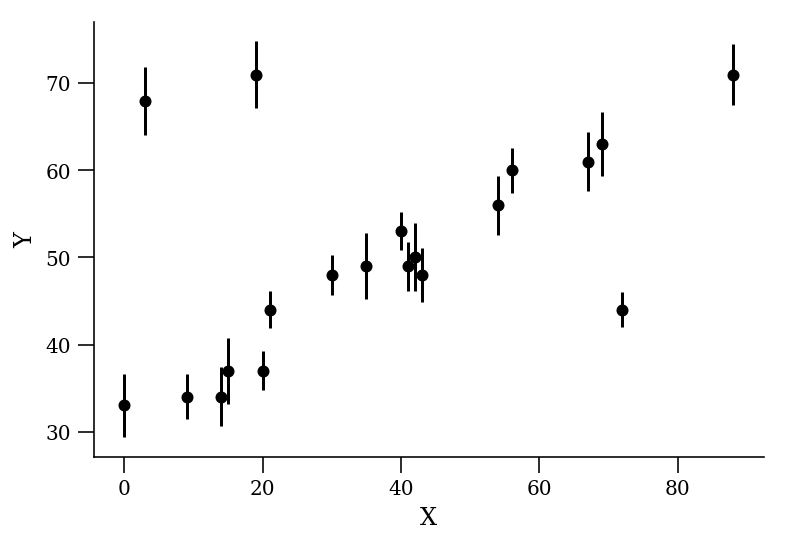

In [3]:
x, y, sy = np.loadtxt('line_outlier.dat', unpack=True)
plt.errorbar(x, y, yerr=sy, marker='o', ls='None', ms=5, color='k');
plt.xlabel('X');
plt.ylabel('Y');

## Blind fit: no outlier model

Let's see what happens if we fit the data without any outlier consideration.

### Equations

We would like to fit a linear model to this above dataset:

$$ \hat{y}(x ~\mid~\alpha, \beta) = \alpha x + \beta $$

We commonly start with the Bayes's rule:

$$ P(\alpha, \beta \mid \{x_i\}, \{y_i\}, \{\sigma_i\}) \propto P(\{x_i\}, \{y_i\}, \{\sigma_i\} | \alpha, \beta) P(\alpha, \beta) $$

Hence we need to define our prior and likelihood

Given this model and the gaussian uncertainties on our data, we can compute a Gaussian likelihood for each point:
$$
P(x_i,y_i,\sigma_i~|~\alpha, \beta) \propto \exp\left[-\frac{1}{2\sigma_i^2}\left(y_i - {y}(x_i~|~\alpha, \beta)\right)^2\right]
$$

The total likelihood is the product of all the individual likelihoods. Computing this and taking the log, we have:
$$
\log P(\{x_i, y_i, \sigma_i\}~|~\alpha, \beta) = \mathrm{const} - \sum_i \frac{1}{2\sigma_i^2}\left(y_i - y(x_i~|~\alpha, \beta)\right)^2
$$

The posterior is simply the likelihood as we do not consider more than uniform priors

In [4]:
def blind_log_likelihood(theta, x, y, sy):
    """ log-likelihood """
    dy = y - theta[0] - theta[1] * x
    logL = - 0.5 * np.log(2 * np.pi * sy ** 2) - 0.5 * (dy / sy) ** 2
    return np.sum(logL)


def blind_log_posterior(theta, x, y, sy):
    """ log-posterior distribution function """
    return blind_log_likelihood(theta, x, y, sy)  # uniform priors

### Now we run the MCMC sampler to explore the parameter space

We'll use the [emcee](http://dan.iel.fm/emcee/current/) package to explore the parameter space. This has the advantage of being more efficient than a Metropolis algorithm, and in particular it is less sensitive to the tuning parameters.

In [5]:
# Note that this step will take a few minutes to run!

ndim = 2       # number of parameters in the model
nwalkers = 48  # number of MCMC walkers
nburn = 1000   # "burn-in" period to let chains stabilize
nsteps = nburn + 100  # number of MCMC steps to take

# set theta near the maximum likelihood, with 
np.random.seed(0)
init = (31, 0.45)
starting_guesses = np.random.normal(init, 1, (nwalkers, 2))

import emcee
sampler = emcee.EnsembleSampler(nwalkers, ndim, blind_log_posterior, 
                                args=[x, y, sy], threads=4)
sampler.run_mcmc(starting_guesses, nsteps)

sample = sampler.chain  # shape = (nwalkers, nsteps, ndim)
sample = sampler.chain[:, nburn:, :].reshape(-1, ndim)

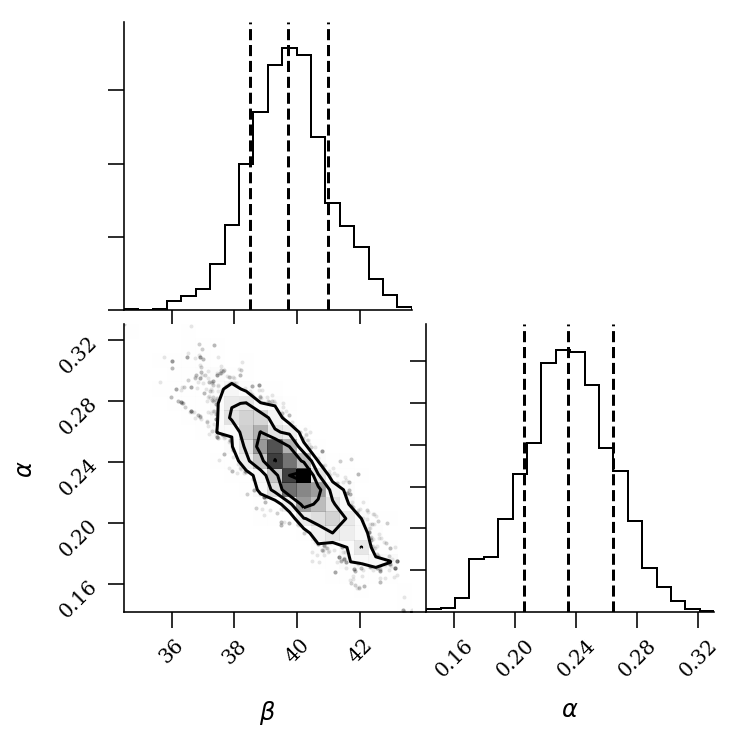

In [6]:
corner(sample, labels=(r'$\beta$', r'$\alpha$'), quantiles=(0.16, 0.50, 0.84));

$\theta_{\rm blind} = 39.71, 0.2346$


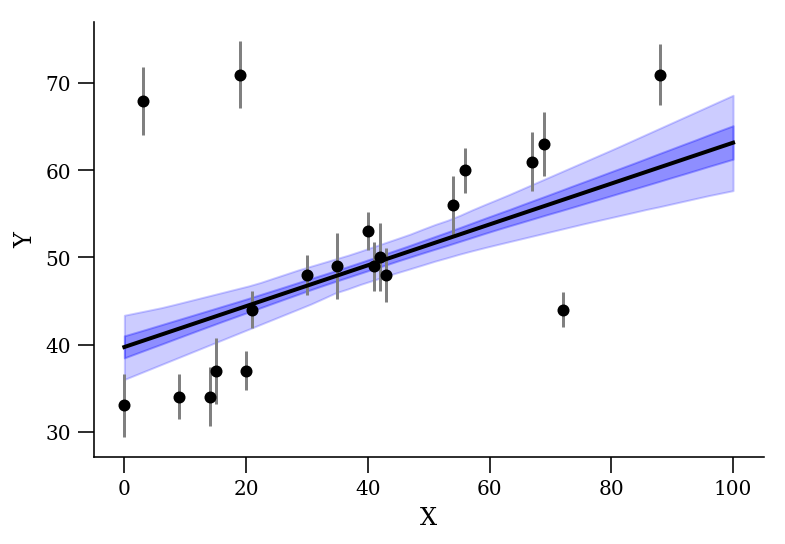

In [7]:
theta_blind = np.median(sample, 0)  # median values
print(r'$\theta_{{\rm blind}} = {0:0.4g}, {1:0.4g}$'.format(*theta_blind))
xfit = np.linspace(0, 100)
lines = sample[:, 0] + sample[:, 1] * xfit[:, None]
ci_blind = np.percentile(lines, (0.1, 15.7, 84.3, 99.9), axis=1)
plt.fill_between(xfit, ci_blind[0], ci_blind[-1], color='b', alpha=0.2)
plt.fill_between(xfit, ci_blind[1], ci_blind[-2], color='b', alpha=0.3)
plt.errorbar(x, y, sy, fmt='.k', ecolor='gray', ms=10)
plt.plot(xfit, theta_blind[0] + theta_blind[1] * xfit, color='black', lw=2)
plt.xlabel('X')
plt.ylabel('Y');

It's clear from this plot that the outliers exerts a disproportionate influence on the fit. 

This is due to the nature of our likelihood function. 
One outlier that is, say $10-\sigma$ (standard deviations) away from the fit will out-weight the contribution of 25 points which are $2-\sigma$ away.

In conclusion, least-square likelihoods are overly sensitive to outliers, and this is causing issues with our fit. 

One way to address this is to simply model the outliers.

# Mixture Model

The Bayesian approach to accounting for outliers generally involves **mixture models** so that the initial model is combined with a complement model accounting for the outliers.

So let's propose a more complicated model that is a mixture between a *signal* and a *background*:

## Brutal version: 1 parameter per datapoint

$$
\begin{array}{ll}
p(\{x_i\}, \{y_i\},\{\sigma_i\}~|~\theta,\{g_i\},\sigma_B) = & \frac{g_i}{\sqrt{2\pi \sigma_i^2}}\exp\left[\frac{-\left(\hat{y}(x_i~|~\theta) - y_i\right)^2}{2\sigma_i^2}\right] \\
&+ \frac{1 - g_i}{\sqrt{2\pi \sigma_B^2}}\exp\left[\frac{-\left(\hat{y}(x_i~|~\theta) - y_i\right)^2}{2\sigma_B^2}\right]
\end{array}
$$

We simply expanded our model with some nuisance parameters: $\{g_i\}$ is a series of weights which range from 0 to 1 and encode for each point $i$ the degree to which it fits the model. 

$g_i=0$ indicates an outlier, in which case a Gaussian of width $\sigma_B$ is used in the computation of the likelihood. This $\sigma_B$ can also be a nuisance parameter.

In [8]:
# theta will be an array of length 2 + N, where N is the number of points
# theta[0] is the intercept, theta[1] is the slope,
# and theta[2 + i] is the weight g_i

# we define theta = (beta, alpha, g0, ..., gN)
# where y = alpha x + beta
# and g_i the 

def log_prior(theta):
    """ prior on theta
        all g_i needs to be between 0 and 1
        uniform prior otherwise
    """
    if (all(theta[2:] > 0) and all(theta[2:] < 1)):
        return 0
    else:
        return -np.inf

def log_likelihood(theta, x, y, sy, sigma_B):
    """ log-likelihood of the mixture model """
    dy = y - theta[0] - theta[1] * x
    
    # g<0 or g>1 leads to NaNs in logarithm
    g = np.clip(theta[2:], 1e-4, 1-1e-4)  
    
    logL1 = np.log(g) - 0.5 * np.log(2 * np.pi * sy ** 2) - 0.5 * (dy / sy) ** 2
    logL2 = np.log(1 - g) - 0.5 * np.log(2 * np.pi * sigma_B ** 2) - 0.5 * (dy / sigma_B) ** 2
    return np.sum(np.logaddexp(logL1, logL2))

def log_posterior(theta, x, y, sy, sigma_B):
    return log_prior(theta) + log_likelihood(theta, x, y, sy, sigma_B)

In [9]:
# Note that this step will take a few minutes to run!
sigma_B = 50 # fixed for now

ndim = 2 + len(x)  # number of parameters in the model
nwalkers = 48  # number of MCMC walkers
nburn = 20000  # "burn-in" period to let chains stabilize
nsteps = 21000  # number of MCMC steps to take

# set theta near the maximum likelihood, with 
np.random.seed(0)
init = (31, 0.45)
starting_guesses = np.zeros((nwalkers, ndim))
starting_guesses[:, :2] = np.random.normal(init, 1, (nwalkers, 2))
starting_guesses[:, 2:] = np.random.normal(0.5, 0.1, (nwalkers, ndim - 2))

import emcee
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=[x, y, sy, sigma_B], threads=4)
sampler.run_mcmc(starting_guesses, nsteps)

sample = sampler.chain  # shape = (nwalkers, nsteps, ndim)
sample = sampler.chain[:, nburn:, :].reshape(-1, ndim)

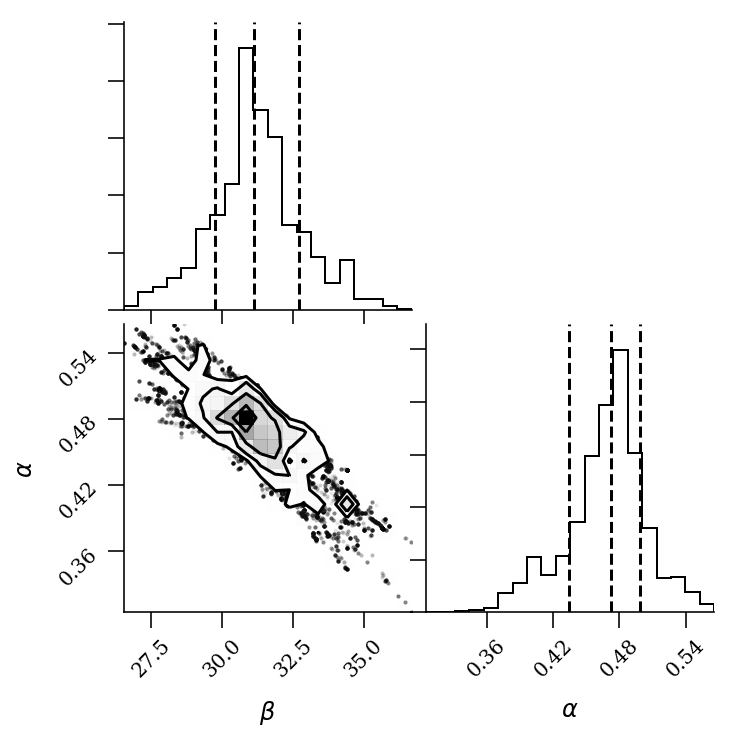

In [10]:
corner(sample[:, :2], labels=(r'$\beta$', r'$\alpha$'), quantiles=(0.16, 0.50, 0.84));

We see a distribution of points near a slope of $\sim 0.45$, and an intercept of $\sim 31$. We'll plot this model over the data below, but first let's see what other information we can extract from this trace.

One nice feature of analyzing MCMC samples is that the choice of nuisance parameters is completely irrelevant during the sampling.

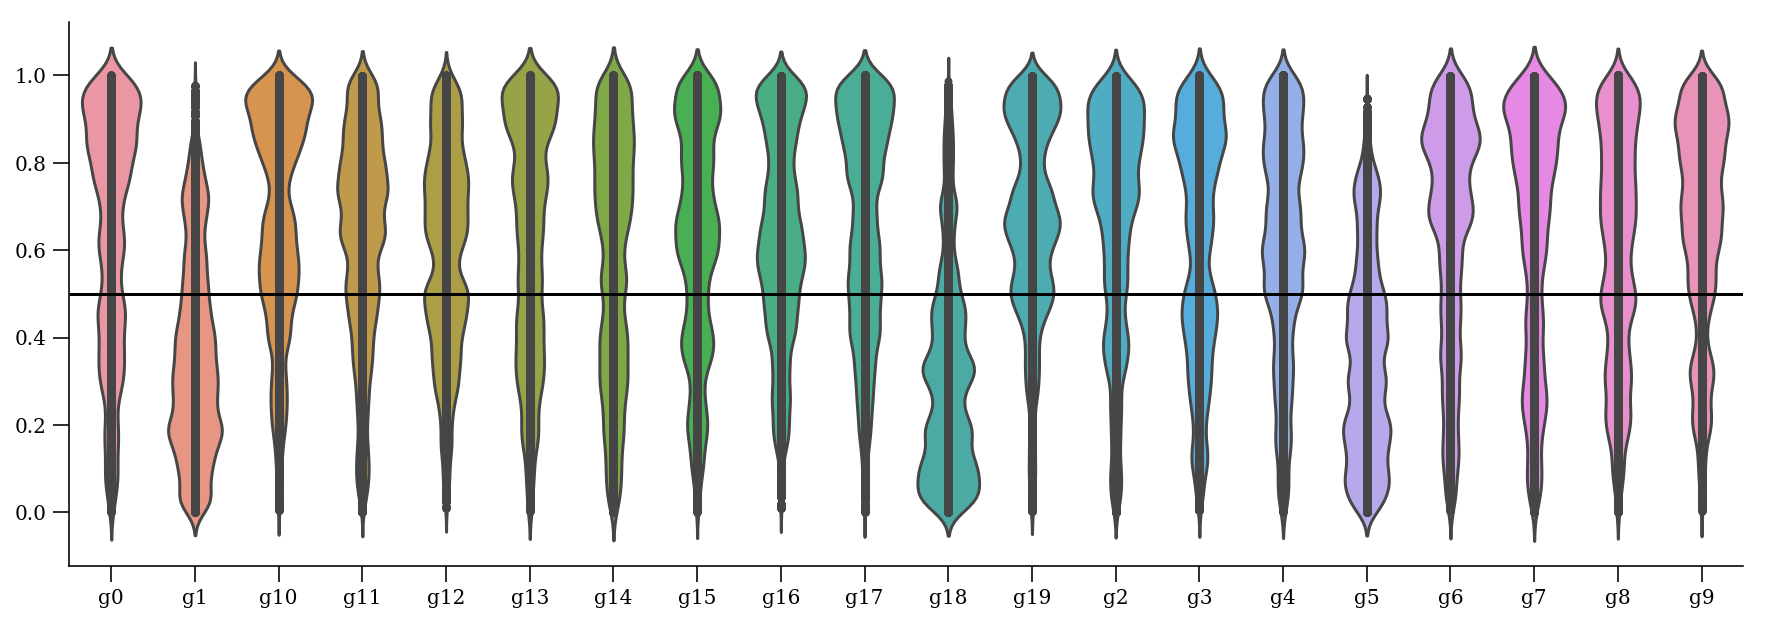

In [11]:
import pandas as pd
import seaborn as sns

# making a dictionary to plot faster
d = {}
for k in range(len(starting_guesses[0]))[2:]:
    d['g{0:d}'.format(k-2)] = sample[:, k]
df = pd.DataFrame.from_dict(d)

plt.figure(figsize=(15, 5))
sns.violinplot(data=df, inner="points")
plt.hlines([0.5], *plt.xlim());

Let's make use of all this information, and plot the marginalized best model over the original data. As a bonus, we'll draw red circles to indicate which points the model detects as outliers:

$\theta_{\rm mean}^{\prime} = 31.12, 0.4727$
number of outliers: $3$


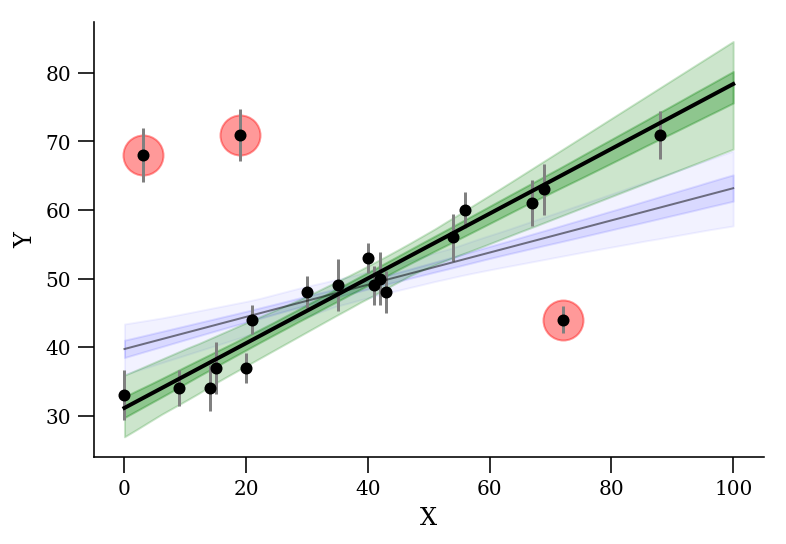

In [12]:
# mean prob
theta_mean = np.median(sample[:, :2], 0)
g = np.median(sample[:, 2:], 0)
print(r'$\theta_{{\rm mean}}^{{\prime}} = {0:0.4g}, {1:0.4g}$'.format(*theta_mean))
print(r'number of outliers: ${0:d}$'.format(sum(g < 0.5)))


outliers = (g <= 0.5)  # arbitrary choice
xfit = np.linspace(0, 100)
lines = sample[:, 0] + sample[:, 1] * xfit[:, None]
ci = np.percentile(lines, (0.1, 15.7, 84.3, 99.9), axis=1)

plt.fill_between(xfit, ci_blind[0], ci_blind[-1], color='b', alpha=0.05)
plt.fill_between(xfit, ci_blind[1], ci_blind[-2], color='b', alpha=0.1)
plt.plot(xfit, theta_blind[0] + theta_blind[1] * xfit, color='black', lw=1, alpha=0.5)
plt.fill_between(xfit, ci[0], ci[-1], color='g', alpha=0.2)
plt.fill_between(xfit, ci[1], ci[-2], color='g', alpha=0.3)
plt.errorbar(x, y, sy, fmt='.k', ecolor='gray', ms=10)
plt.plot(xfit, theta_mean[0] + theta_mean[1] * xfit, color='black', lw=2)
plt.plot(x[outliers], y[outliers], 'ro', ms=20, mec='red', mfc='red', zorder=1, alpha=0.4)
plt.xlabel('X')
plt.ylabel('Y');

The result shown by the dark line matches our intuition. In addition, the points automatically identified as outliers are the ones we would identify by eye to be suspicious. The blue shaded region indicates the previous "blind" result.

## The smarter version

This previous model of outliers takes a simple linear model of $2$ parameters and transforms it into a $(N+2)$ parameters, $N$ being the number of datapoints. This leads to $22$ parameters in our case. What happens if you have $200$ data points? 

The problem with the previous model was that it adds one parameter for each data point, which not only makes the fitting expensive, but also makes the problem untracktable very quickly.

Based on the same formulation, we can consider one global $g$ instead individuals, which will characterize on the ensemble the probability of having an outlier. In other words, the fraction of outliers relative to the dataset. 

$$
\begin{array}{ll}
p(\{x_i\}, \{y_i\},\{\sigma_i\}~|~\theta,g,\sigma_B) = & \frac{g}{\sqrt{2\pi \sigma_i^2}}\exp\left[\frac{-\left(\hat{y}(x_i~|~\theta) - y_i\right)^2}{2\sigma_i^2}\right] \\
&+ \frac{1 - g}{\sqrt{2\pi \sigma_B^2}}\exp\left[\frac{-\left(\hat{y}(x_i~|~\theta) - y_i\right)^2}{2\sigma_B^2}\right]
\end{array}
$$

In [13]:
# theta will be an array of length 2 + 1, where N is the number of points
# theta[0] is the intercept, theta[1] is the slope, theta[2] the mixing factor

# we define theta = (beta, alpha, g)
# where y = alpha x + beta

def log_prior_full(theta):
    """ prior on theta
        all g_i needs to be between 0 and 1
        uniform prior otherwise
    """
    if (theta[2] <= 0) or (theta[2] >= 1):
        return -np.inf
    
    if theta[3] < 0:
        return -np.inf
    
    return 0.
    

def log_likelihood_full(theta, x, y, sy):
    """ log-likelihood of the mixture model """
    dy = y - theta[0] - theta[1] * x
    
    # g<0 or g>1 leads to NaNs in logarithm
    g = float(theta[2])
    if g > 1 - 1e-4:
        g = 1 - 1e-4
    elif g < 1e-4:
        g = 1e-4
        
    sigma_B = theta[-1]
    
    logL1 = np.log(g) - 0.5 * np.log(2 * np.pi * sy ** 2) - 0.5 * (dy / sy) ** 2
    logL2 = np.log(1 - g) - 0.5 * np.log(2 * np.pi * sigma_B ** 2) - 0.5 * (dy / sigma_B) ** 2
    return np.sum(np.logaddexp(logL1, logL2))


def log_posterior_full(theta, x, y, sy):
    return log_prior_full(theta) + log_likelihood_full(theta, x, y, sy)

We simply have $1$ nuisance parameters: $g$ which ranges from 0 to 1.

Similarly to the previous model, $g=0$ indicates an outlier, in which case a Gaussian of width $\sigma_B$ is used in the computation of the likelihood. This $\sigma_B$ can also be a nuisance parameter.

From this model, we can estimate the odds of being an outlier with
$$ Odds_{outlier}(x_i, y_i, \sigma_i) = \frac{(1-g) P(x_i, y_i | \sigma_B)}{g\,P(x_i, y_i | \sigma_i, \alpha, \beta) + (1-g) P(x_i, y_i | \sigma_B)}$$

In [14]:
def odds_outlier_full(theta, x, y, sy):
    """ Odds of being an outlier
    
    .. math::
    
        Odd(x, y | sy, sigma_B, theta) = (1-g) P(x, y | sigma_B) / (g P(x, y | sy, theta) + (1-g) P(x, y | sigma_B)
    """
    dy = y - theta[0] - theta[1] * x
    
    # g<0 or g>1 leads to NaNs in logarithm
    g = float(theta[2])
    if g > 1 - 1e-4:
        g = 1 - 1e-4
    elif g < 1e-4:
        g = 1e-4
        
    sigma_B = theta[-1]
    
    logL1 = np.log(g) - 0.5 * np.log(2 * np.pi * sy ** 2) - 0.5 * (dy / sy) ** 2
    logL2 = np.log(1 - g) - 0.5 * np.log(2 * np.pi * sigma_B ** 2) - 0.5 * (dy / sigma_B) ** 2
    
    return np.exp(logL2) / np.exp(np.logaddexp(logL1, logL2))

Now we run the MCMC sampler to explore the parameter space

In [15]:
# Note that this step will take a few minutes to run!

ndim = 2 + 2  # number of parameters in the model
nwalkers = 48  # number of MCMC walkers
nburn = 1000  # "burn-in" period to let chains stabilize
nsteps = nburn + 100  # number of MCMC steps to take

# set theta near the maximum likelihood, with 
np.random.seed(0)
init = np.array([31, 0.45, 0.2, 0.8])
# careful with the initialization: g must be within the priors!
starting_guesses = np.random.normal(init, 0.01, (nwalkers, ndim))

import emcee
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior_full, args=[x, y, sy], threads=4)
sampler.run_mcmc(starting_guesses, nsteps)

sample = sampler.chain  # shape = (nwalkers, nsteps, ndim)
sample = sampler.chain[:, nburn:, :].reshape(-1, ndim)

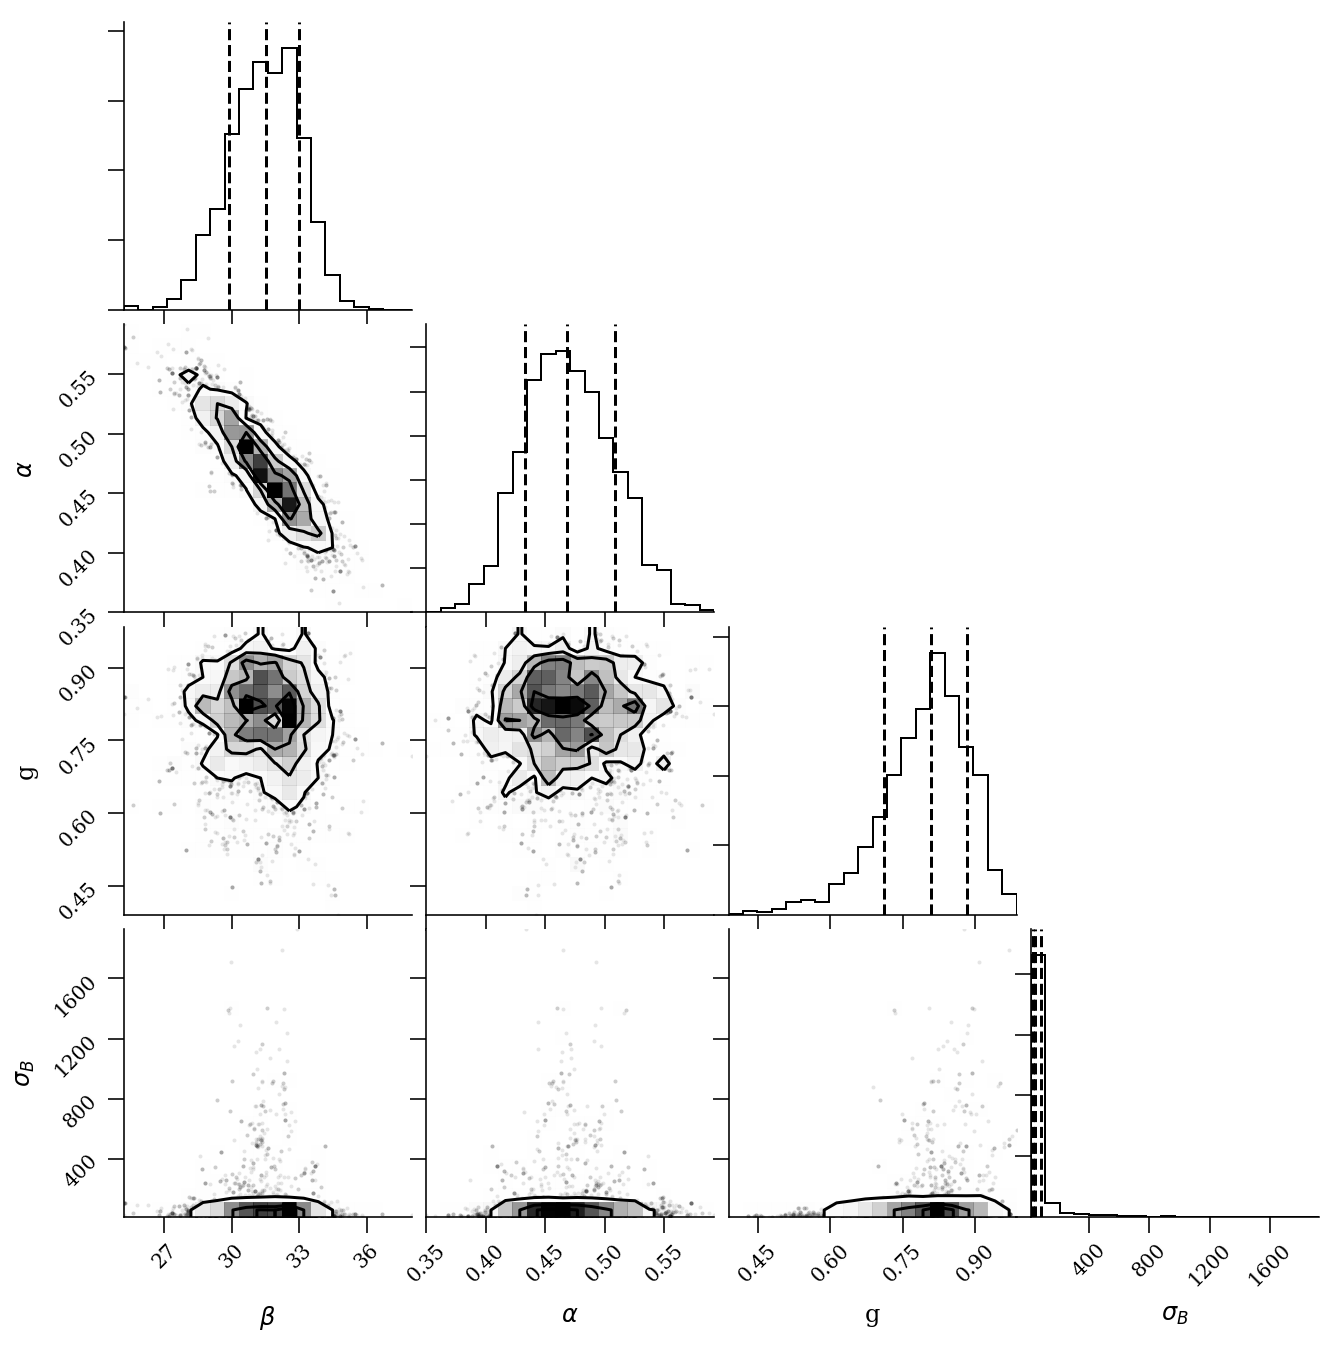

In [16]:
corner(sample, labels=(r'$\beta$', r'$\alpha$', r'g', r'$\sigma_B$'), quantiles=(0.16, 0.50, 0.84));

$\theta_{\rm mean}^{\prime} = 31.53, 0.4679$
number of outliers: $3$


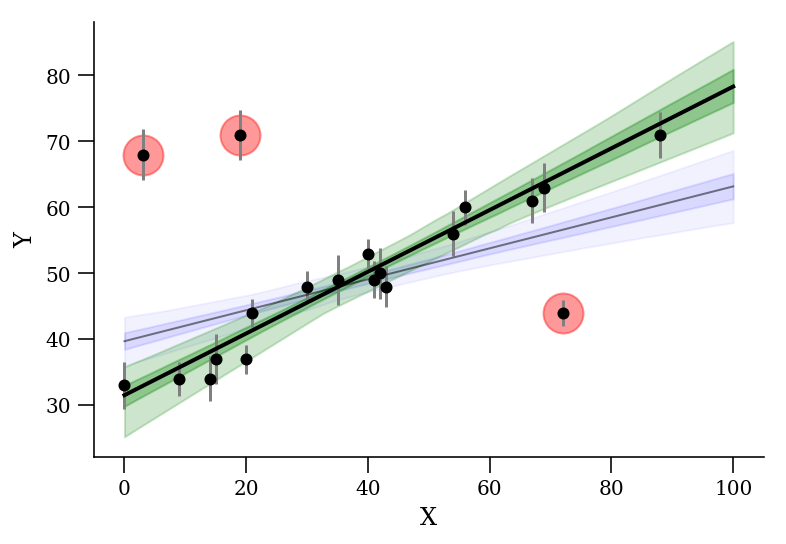

In [17]:
# mean prob
theta_mean = np.median(sample[:, :2], 0)
outliers = odds_outlier_full(np.median(sample, axis=0), x, y, sy) > 0.5
print(r'$\theta_{{\rm mean}}^{{\prime}} = {0:0.4g}, {1:0.4g}$'.format(*theta_mean))
print(r'number of outliers: ${0:d}$'.format(sum(outliers)))
              
xfit = np.linspace(0, 100)
lines = sample[:, 0] + sample[:, 1] * xfit[:, None]
ci = np.percentile(lines, (0.1, 15.7, 84.3, 99.9), axis=1)

plt.fill_between(xfit, ci_blind[0], ci_blind[-1], color='b', alpha=0.05)
plt.fill_between(xfit, ci_blind[1], ci_blind[-2], color='b', alpha=0.1)
plt.plot(xfit, theta_blind[0] + theta_blind[1] * xfit, color='black', lw=1, alpha=0.5)
plt.fill_between(xfit, ci[0], ci[-1], color='g', alpha=0.2)
plt.fill_between(xfit, ci[1], ci[-2], color='g', alpha=0.3)
plt.errorbar(x, y, sy, fmt='.k', ecolor='gray', ms=10)
plt.plot(xfit, theta_mean[0] + theta_mean[1] * xfit, color='black', lw=2)
plt.plot(x[outliers], y[outliers], 'ro', ms=20, mec='red', mfc='red', zorder=1, alpha=0.4)
plt.xlabel('X')
plt.ylabel('Y');

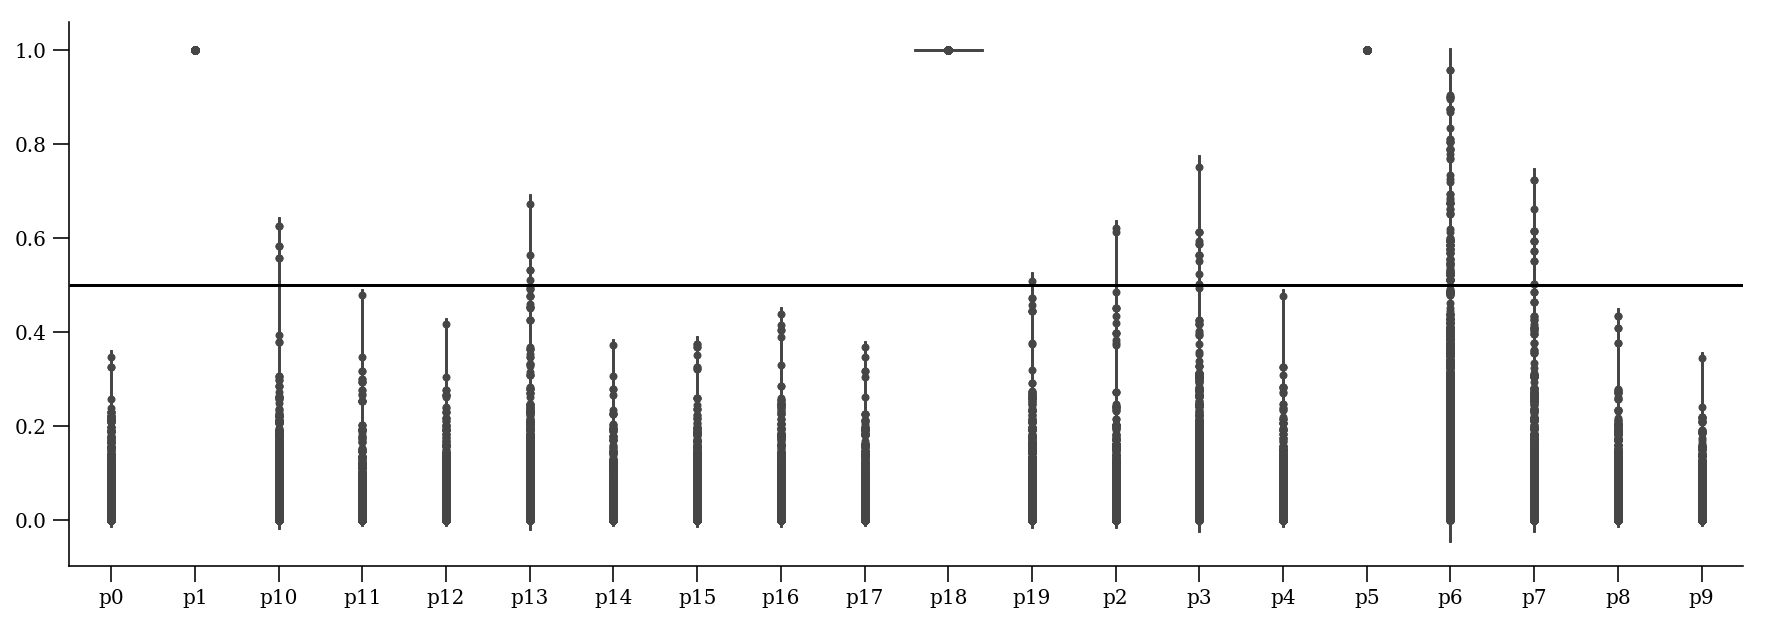

In [18]:
import pandas as pd
import seaborn as sns

outliers = np.vstack([odds_outlier_full(tk, x, y, sy) for tk in sample]).T
d = {}
for e, k in enumerate(outliers):
    d['p{0:d}'.format(e)] = k

# making a dictionary to plot faster
df = pd.DataFrame.from_dict(d)

plt.figure(figsize=(15, 5))
sns.violinplot(data=df, inner="points")
plt.hlines([0.5], *plt.xlim());

# Implementing with PYMC

A complementary approach to implementing probabilistic models is to use **Probabilistic Programming**.

Probabilistic programming is designed to describe probabilistic models and then perform inference in those models. It is closely related to graphical models, however they are usually more expressive and but flexible.

PyMC3 is a Python package for probabilistic programming. (one could also use PyStan).

## Blind fit: no outlier model

Let's see what happens if we fit the data without any outlier consideration.

### Equations

We would like to fit a linear model to this above dataset:

$$ \hat{y}(x ~\mid~\alpha, \beta) = \alpha x + \beta $$

and as we have Gaussian uncertainties on our measurements, our likelyhood is then

$$ y ~\mid~ \hat{y}, \sigma_y \rightsquigarrow \mathcal{N}(\hat{y}, \sigma_y)$$

One must provide some prior to properly implement the model. Let's suppose weak informative normal priors (they correspond to a Ridge regression context)

$$ \alpha \rightsquigarrow \mathcal{N}(0, 100) $$
$$ \beta \rightsquigarrow \mathcal{N}(0, 100) $$

This implements itself in PyMC as follow (note that internal operations must be Theano tensors ops)

In [19]:
import pymc3 as pm
import theano as thno
import theano.tensor as T

/Users/fouesneau/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [20]:
with pm.Model() as mdl_ols:

    # Define weakly informative Normal priors to give Ridge regression
    b0 = pm.Normal('b0', mu=0, sd=100)
    b1 = pm.Normal('b1', mu=0, sd=100)

    # Define linear model
    ypred = b0 + b1 * x

    # Use y error from dataset, convert into theano variable
    sigma_y = thno.shared(np.asarray(sy, dtype=thno.config.floatX), name='sigma_y')

    # Define Normal likelihood
    likelihood = pm.Normal('likelihood', mu=ypred, sd=sigma_y, observed=y)

The model `mdl_ols` is not coded. We can sample it. (The default sampler when applicable in PyMC is NUTS: No U-Turn Sampler)

In [21]:
with mdl_ols:
    ## take samples
    traces_ols = pm.sample(2000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/Users/fouesneau/anaconda/lib/python3.6/site-packages/pymc3/model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b1, b0]
100%|██████████| 3000/3000 [00:03<00:00, 914.29it/s]
INFO (theano.gof.compilelock): Waiting for existing lock by process '60875' (I am process '60876')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/fouesneau/.theano/compiledir_Darwin-17.4.0-x86_64-i386-64bit-i386-3.6.2-64/lock_dir
INFO (theano.gof.compilelock): Waiting for existing lock by process '60875' (I am process '60877')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/fouesneau/.theano/compiledir_Darwin-17.4.0-x86_64-i386-64bit-i386-3.6.2-64/lock_dir
IN

$\theta_{\rm blind} = 39.74, 0.2356$


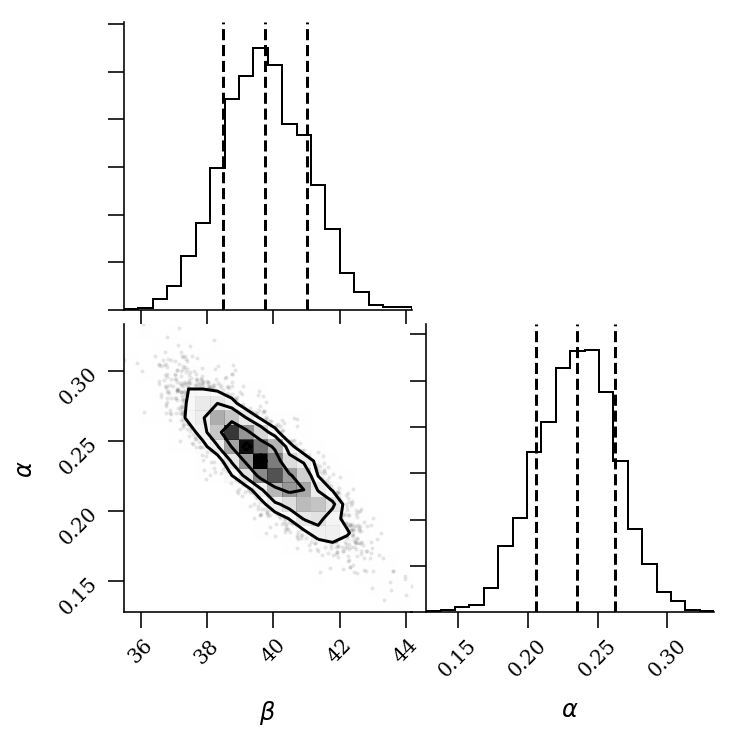

In [22]:
varnames = 'b0', 'b1'
sample = np.array([traces_ols[-1000:][k] for k in varnames]).T
theta_blind = np.median(sample, 0)  # median values
print(r'$\theta_{{\rm blind}} = {0:0.4g}, {1:0.4g}$'.format(*theta_blind))
corner(sample, labels=(r'$\beta$', r'$\alpha$'), quantiles=(0.16, 0.50, 0.84));

PyMC also offers some summary plotting routines

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
b0,39.741557,1.257362,0.039755,37.239354,42.077668,1072.0,0.999701
b1,0.234903,0.028154,0.000896,0.181384,0.289801,1087.0,0.999563


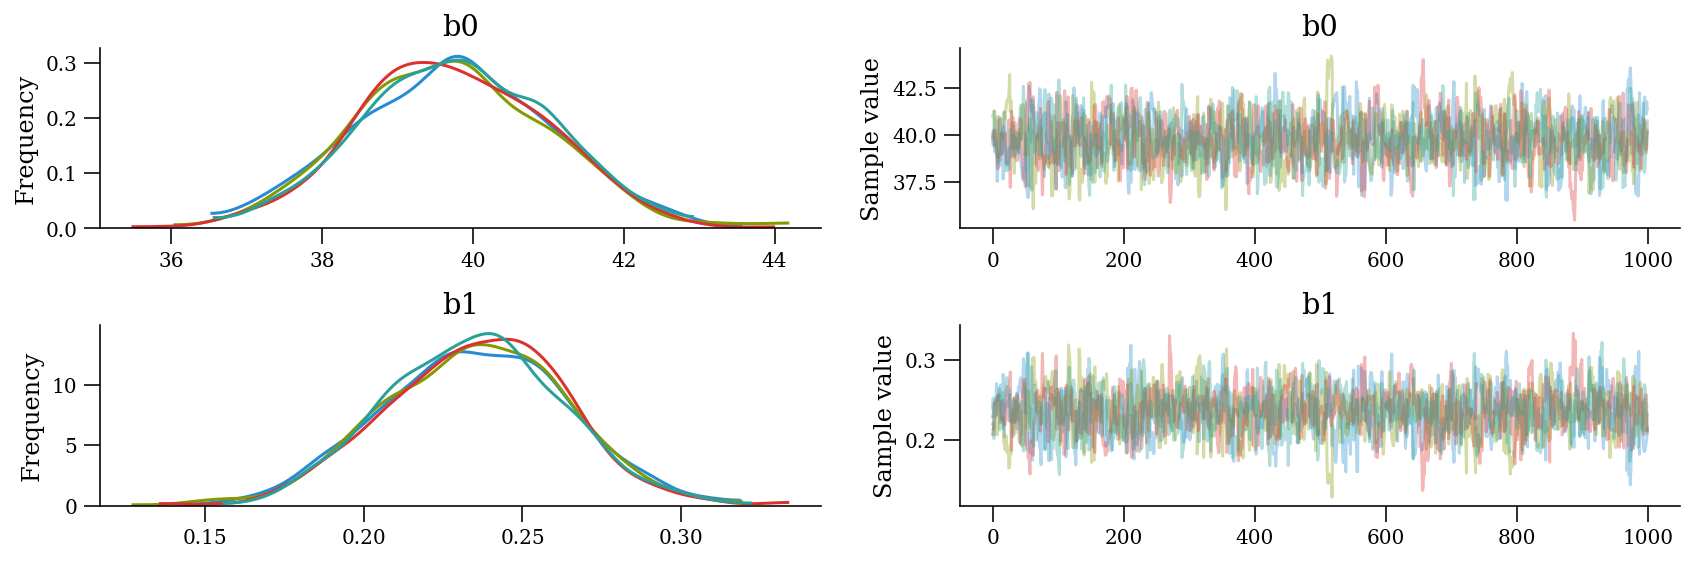

In [23]:
pm.traceplot(traces_ols[-1000:])
pm.summary(traces_ols[-1000:])

We can sample the predictive posterior to visualize the result with the data

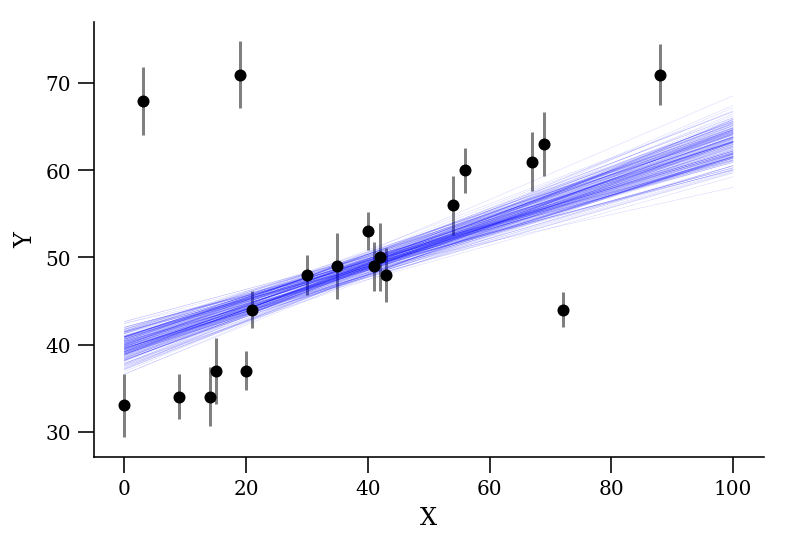

In [24]:
xfit = np.linspace(0, 100)
lm = lambda x, theta: theta['b0'] + theta['b1'] * x
pm.plot_posterior_predictive_glm(traces_ols[-1000:],
        eval=xfit, lm=lm, samples=200, 
        color='b', alpha=.2, lw=0.2, rasterized=True)
plt.errorbar(x, y, sy, fmt='.k', ecolor='gray', ms=10)
plt.title('')
plt.xlabel('X')
plt.ylabel('Y');

The result is very similar to what we had with `emcee`. It's clear from this plot that the outliers exerts a disproportionate influence on the fit. 

## Modeling the outliers

### Equations

We now make the probabilistic equations that link the various variables together:

We would like to fit a linear model to this above dataset:

$$ \hat{y}_{in}(x ~\mid~\alpha, \beta) = \alpha x + \beta $$

One must provide some prior to properly implement the model. Let's suppose weak informative normal priors (they correspond to a Ridge regression context)

$$ \alpha \rightsquigarrow \mathcal{N}(0, 100) $$
$$ \beta \rightsquigarrow \mathcal{N}(0, 100) $$

We also have the outlier component $\hat{y}_{out}$
$$ \hat{y}_{out} \rightsquigarrow \mathcal{N}(\hat{y}_{out}, \sigma_{out})$$
where $\sigma_{out}$ is unknown but positively constrained (half-Normal prior)
$$ \sigma_{out} \rightsquigarrow \mathcal{N^+}(0, 100)$$

And each data point has a Bernoulli probability (0 or 1) to be an outlier or not with a probability $g$
$$ g_i \rightsquigarrow \mathcal{B}(g) $$

$g$ sets the ratio of inliers to outliers. Given our setup, it corresponds to the fraction of outliers in our model. One can set a wealky informative prior on $g$ as
$$ g \rightsquigarrow \mathcal{U}(0, 0.5) $$
(hopefully we do not have more than half of the data being made of outliers)


Our final model is a mixture of the two components:

$$ y_i ~\mid~ \hat{y}_{in}, \hat{y}_{out}, \sigma_y, \sigma_{out} \rightsquigarrow 
(1 - g_i) \, \mathcal{N}(\hat{y}_{in}, \sigma_y) + g_i \, \mathcal{N}(\hat{y}_{out}, \sigma_{out})$$





Based upon the formulation above where each point has a probability of being an outlier $g_i$, our likelihood is then given by

$$
\begin{array}{ll}
p(\{x_i\}, \{y_i\},\{\sigma_i\}~|~\theta,\{g_i\},\sigma_B) = & \frac{1 - g_i}{\sqrt{2\pi \sigma_i^2}}\exp\left[\frac{-\left(\hat{y}_{in}(x_i~|~\theta) - y_i\right)^2}{2\sigma_i^2}\right] \\
&+ \frac{g_i}{\sqrt{2\pi \sigma_B^2}}\exp\left[\frac{-\left(\hat{y}_{out}(x_i~|~\theta) - y_i\right)^2}{2\sigma_{out}^2}\right]
\end{array}
$$

We expanded our model with some nuisance parameters: $\{g_i\}$ ($g_i = 1$ means outlier).

We code the likelihood (using Theano) as:

In [25]:
def logp_signoise(yobs, is_outlier, ypred_in, sigma_y_in, ypred_out, sigma_y_out):
    '''
    Define custom loglikelihood for inliers vs outliers.
    '''

    # likelihood for inliers
    dy_in = yobs - ypred_in + 1e-4   ##  constant for numeric stability
    
    logL_in = (
        T.log(1 - is_outlier) -
        0.5 * (dy_in / sigma_y_in) ** 2 - 
        0.5 * T.log(2 * np.pi * sigma_y_in ** 2)
    )

    # likelihood for outliers
    dy_out = yobs - ypred_out + 1e-4
    sy_out_2 = sigma_y_in ** 2 + sigma_y_out ** 2
    logL_out = (
        T.log(is_outlier) -
        0.5 * (dy_out ** 2 / sy_out_2) - 
        0.5 * T.log(2 * np.pi * sy_out_2)
    )

    return T.sum(T.log(T.exp(logL_in) + T.exp(logL_out)))

Our likelihood can be expressed directly with tensor operations (otherwise we'd need to use theano's `@as_op`
decorator). This means we get the likelihood gradient for free thanks to the Theano backend, which makes the MCMC sampler more efficient (HMC methods)

Now we code the probabilistic model as follow (using `DensityDist` to set the final mixture likelihood)

In [26]:
with pm.Model() as mdl_signoise:

    ## Define weakly informative Normal priors to give Ridge regression
    b0 = pm.Normal('b0', mu=0, sd=10, testval=pm.floatX(0.1))
    b1 = pm.Normal('b1', mu=0, sd=10, testval=pm.floatX(1.))

    ## Define linear model
    ypred_in = b0 + b1 * x

    ## Define weakly informative priors for the mean and variance of outliers
    ypred_out = pm.Normal('ypred_out', mu=0, sd=100, testval=pm.floatX(1.))
    sigma_y_out = pm.HalfNormal('sigma_y_out', sd=100, testval=pm.floatX(1.))

    ## Define Bernoulli inlier / outlier flags according to a hyperprior
    ## fraction of outliers, itself constrained to [0,.5] for symmetry
    frac_outliers = pm.Uniform('frac_outliers', lower=0., upper=.5)
    is_outlier = pm.Bernoulli('is_outlier', p=frac_outliers, shape=len(x),
                              testval=np.random.rand(len(x)) < 0.2)

    ## Extract observed y and sigma_y from dataset, encode as theano objects
    yobs = thno.shared(np.asarray(y, dtype=thno.config.floatX), name='yobs')
    sigma_y_in = thno.shared(np.asarray(sy, dtype=thno.config.floatX), name='sigma_y_in')

    ## Use custom likelihood using DensityDist
    likelihood = pm.DensityDist('likelihood', logp_signoise,
                        observed={'yobs': yobs, 'is_outlier': is_outlier,
                                  'ypred_in': ypred_in, 'sigma_y_in': sigma_y_in,
                                  'ypred_out': ypred_out, 'sigma_y_out': sigma_y_out})

And we sample the model

In [27]:
with mdl_signoise:
    ## take samples
    traces_signoise = pm.sample(20000, tune=10000, progressbar=True)

/Users/fouesneau/anaconda/lib/python3.6/site-packages/pymc3/model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [frac_outliers_interval__, sigma_y_out_log__, ypred_out, b1, b0]
>BinaryGibbsMetropolis: [is_outlier]
 99%|█████████▉| 29833/30000 [02:16<00:00, 218.41it/s]/Users/fouesneau/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
100%|█████████▉| 29990/30000 [02:17<00:00, 218.58it/s]/Users/fouesneau/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
100%|██████████| 30000/30000 [02:17<00:00, 218.58it/s]
/Users/fouesneau/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: Run

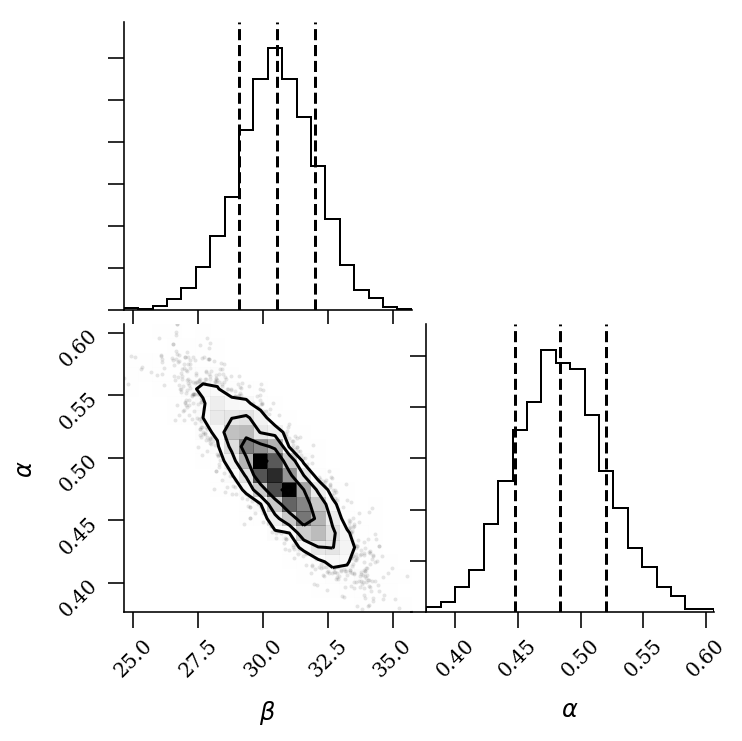

In [28]:
sample = np.array([traces_signoise[-1000:][k] for k in varnames]).T
corner(sample, labels=(r'$\beta$', r'$\alpha$', r'$\sigma_B$', r'g'), quantiles=(0.16, 0.50, 0.84));

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
b0,30.523393,1.496401,0.033238,27.618496,33.495360,1733.0,0.999720
b1,0.484442,0.036554,0.000817,0.418456,0.561848,1807.0,0.999695
sigma_y_out,28.010603,23.342880,0.666196,5.384026,72.551875,1061.0,1.001240
frac_outliers,0.216826,0.091275,0.002224,0.049877,0.397620,1810.0,0.999772


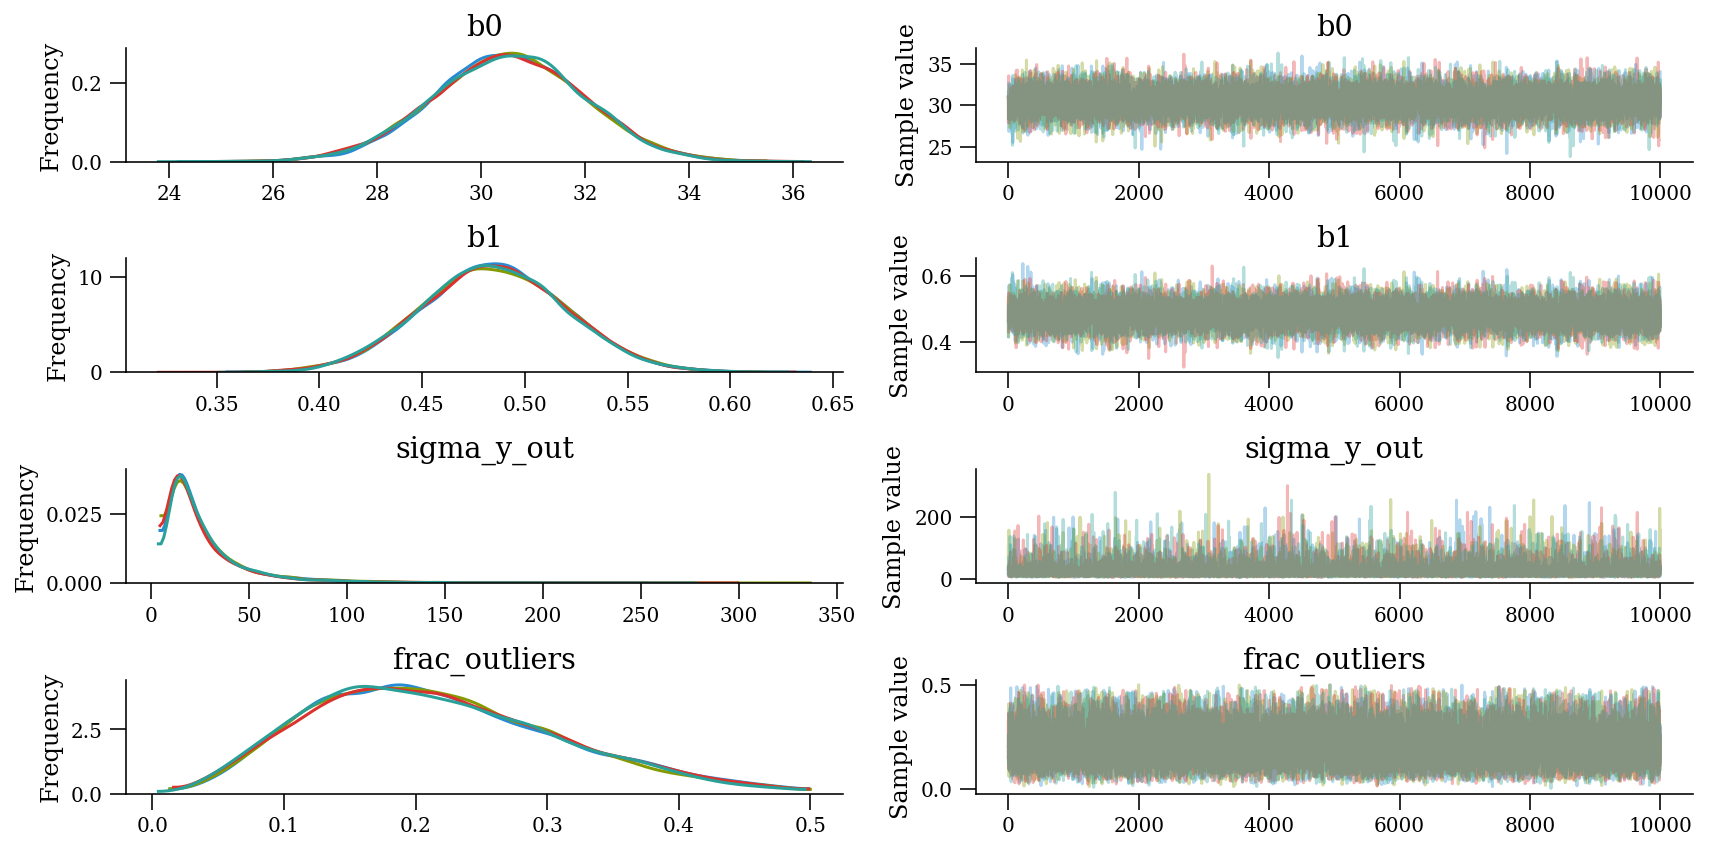

In [29]:
varnames = ['b0', 'b1', 'sigma_y_out', 'frac_outliers']
pm.traceplot(traces_signoise[-10000:], varnames=varnames, figsize=(12,len(varnames)*1.5))
pm.summary(traces_signoise[-1000:], varnames=varnames)

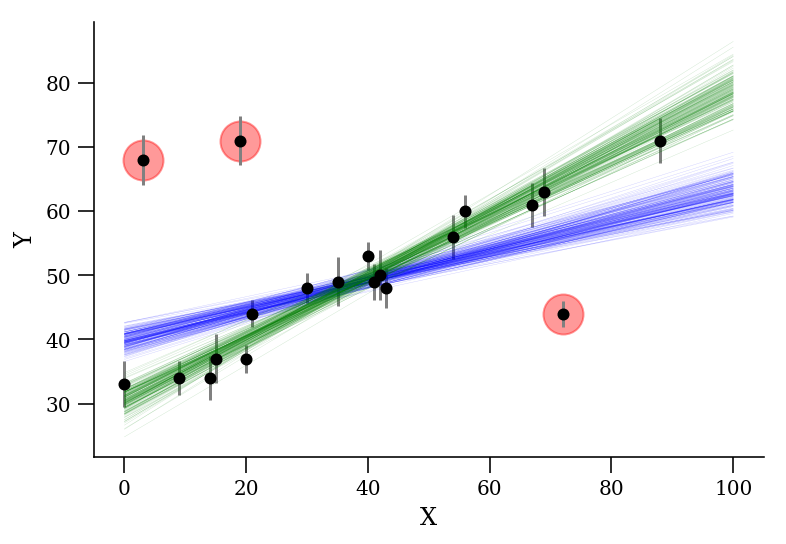

In [30]:
xfit = np.linspace(0, 100)
lm = lambda x, theta: theta['b0'] + theta['b1'] * x

outliers = np.percentile(traces_signoise[-1000:]['is_outlier'],50, axis=0) > 0.5
plt.plot(x[outliers], y[outliers], 'ro', ms=20, mec='red', mfc='red', zorder=1, alpha=0.4)

pm.plot_posterior_predictive_glm(traces_ols[-1000:],
        eval=xfit, lm=lm, samples=200, 
        color='b', alpha=.2, lw=0.2, rasterized=True)
pm.plot_posterior_predictive_glm(traces_signoise[-1000:],
        eval=xfit, lm=lm, samples=200, 
        color='g', alpha=.2, lw=0.2, rasterized=True)
plt.errorbar(x, y, sy, fmt='.k', ecolor='gray', ms=10)
plt.title('')
plt.xlabel('X')
plt.ylabel('Y');